<b>DATA LOADING AND PREPROCESSING</b>

In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv("telecom dataset.csv")
data.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
print(data.dtypes)

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object


In [4]:
# Check for missing values
print("Missing values:\n", data.isnull().sum())

# If missing values exist, handle them (e.g., fill with median or drop)
# df.fillna(df.median(), inplace=True)

Missing values:
 state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


In [5]:
# Drop duplicates
data.drop_duplicates(inplace=True)
print("Shape after removing duplicates:", data.shape)

Shape after removing duplicates: (3333, 21)


In [6]:
# Drop irrelevant columns
data.drop(['phone number', 'account length', 'state'
         ], 
        axis=1, inplace=True)

print("Columns after dropping:", data.columns.tolist())
data.head()

Columns after dropping: ['area code', 'international plan', 'voice mail plan', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn']


,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


<b>EXPLORATORY DATA ANALYSIS</b>

Feature distributions

C:\Users\Admin\AppData\Local\Temp\ipykernel_9528\3327038394.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn', data=data, palette='Set2')


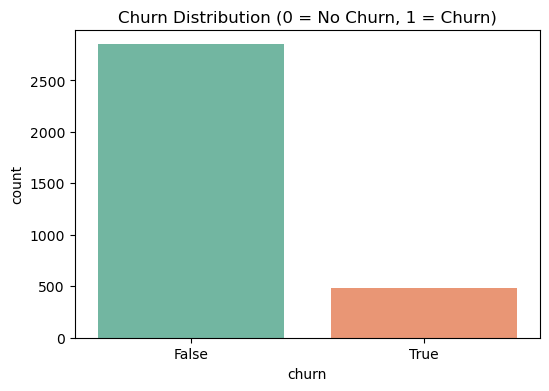

Churn Rate: 14.49%


C:\Users\Admin\AppData\Local\Temp\ipykernel_9528\3327038394.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Churn Rate: {churn_percent[1]:.2f}%")


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=data, palette='Set2')
plt.title('Churn Distribution (0 = No Churn, 1 = Churn)')
plt.show()

# Calculate percentages
churn_percent = data['churn'].value_counts(normalize=True) * 100
print(f"Churn Rate: {churn_percent[1]:.2f}%")

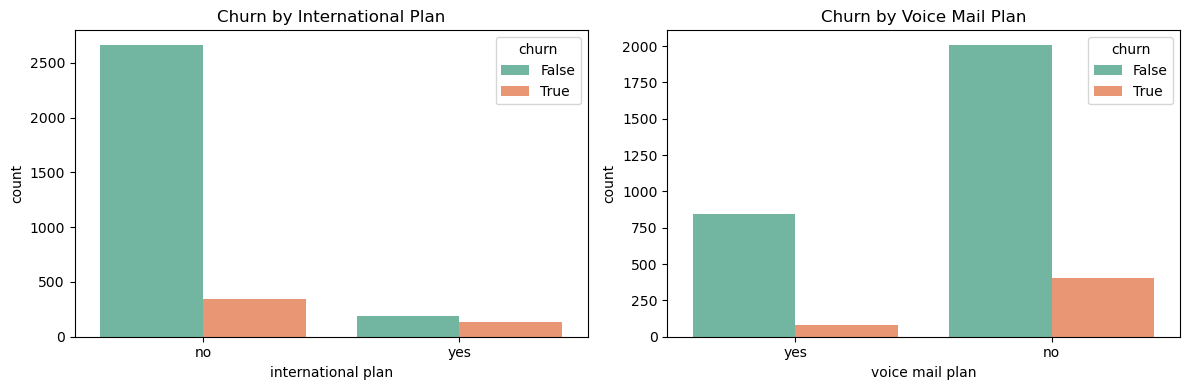

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# International plan
sns.countplot(x='international plan', hue='churn', data=data, ax=axes[0], palette='Set2')
axes[0].set_title('Churn by International Plan')

# Voice mail plan
sns.countplot(x='voice mail plan', hue='churn', data=data, ax=axes[1], palette='Set2')
axes[1].set_title('Churn by Voice Mail Plan')

plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9528\434397814.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y=feature, data=data, palette='Set2')
C:\Users\Admin\AppData\Local\Temp\ipykernel_9528\434397814.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y=feature, data=data, palette='Set2')
C:\Users\Admin\AppData\Local\Temp\ipykernel_9528\434397814.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y=feature, data=data, palette='Set2')
C:\Users\Admin\AppData\Local\Temp\ipykernel_9528\434397814.py:14

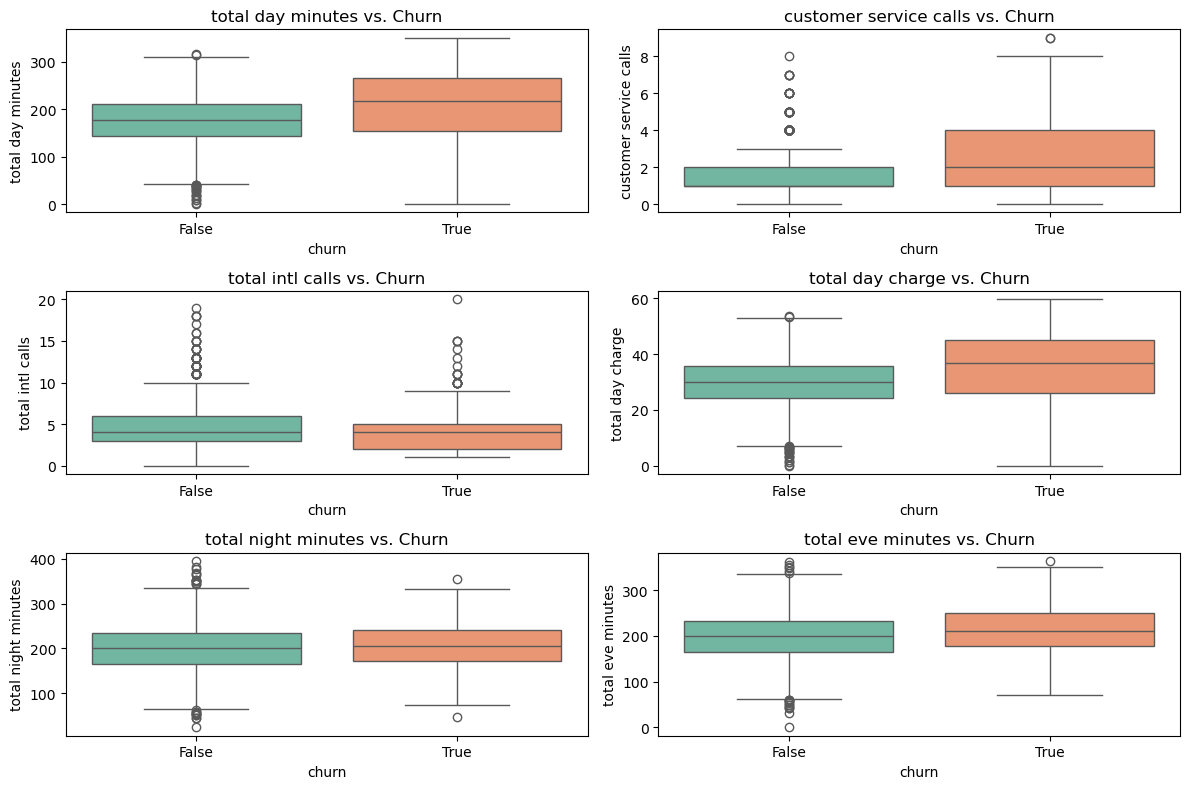

In [11]:
numerical_features = [
    'total day minutes', 
    'customer service calls', 
    'total intl calls',
    'total day charge',
    'total night minutes',
    'total eve minutes'
         
]

plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='churn', y=feature, data=data, palette='Set2')
    plt.title(f'{feature} vs. Churn')
plt.tight_layout()
plt.show()

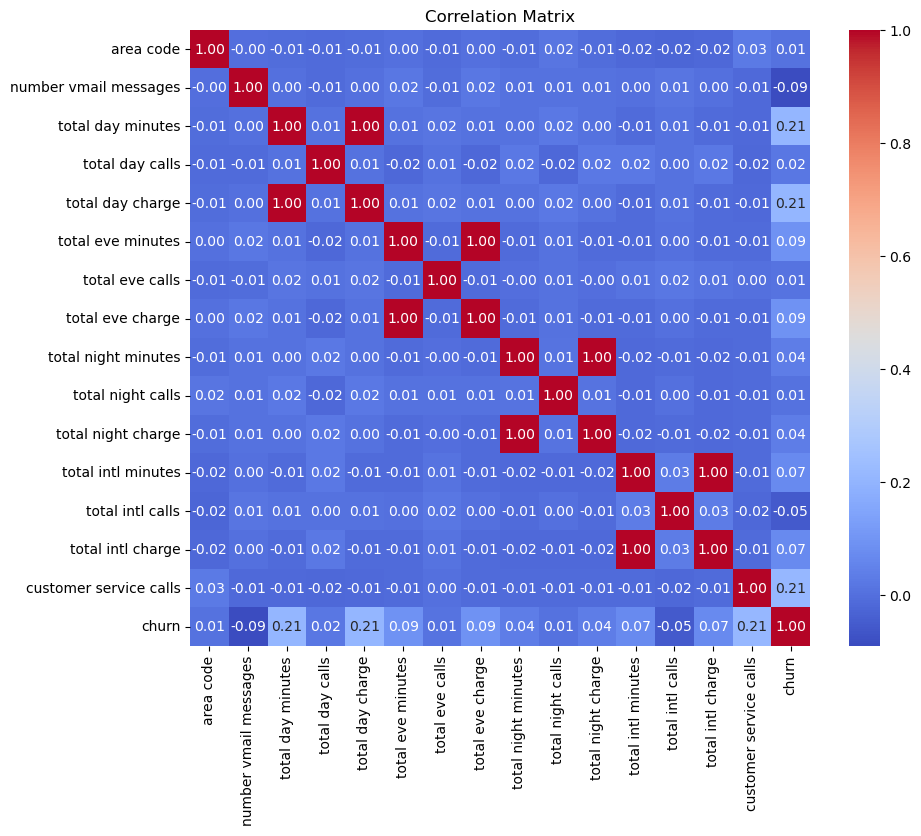

In [12]:
# 4. Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

<b>FEATURE ENGINEERING</b>

C:\Users\Admin\AppData\Local\Temp\ipykernel_9528\277811901.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='total_night_minutes', data=data, palette='Set2')


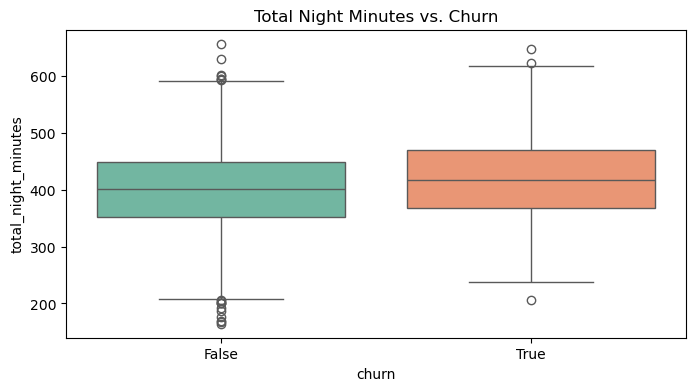

In [14]:
data['total_night_minutes'] = data['total eve minutes'] + data['total night minutes']
plt.figure(figsize=(8, 4))
sns.boxplot(x='churn', y='total_night_minutes', data=data, palette='Set2')
plt.title('Total Night Minutes vs. Churn')
plt.show()

In [15]:
print("Class distribution:\n", data['churn'].value_counts())
print(f"Churn Rate: {data['churn'].mean() * 100:.2f}%")

Class distribution:
 churn
False    2850
True      483
Name: count, dtype: int64
Churn Rate: 14.49%


<b>MODELING</b>

In [17]:
# Convert 'yes'/'no' to 1/0
data['international plan'] = data['international plan'].map({'yes': 1, 'no': 0})
data['voice mail plan'] = data['voice mail plan'].map({'yes': 1, 'no': 0})

# Convert boolean 'churn' to 1/0
data['churn'] = data['churn'].astype(int)

print(data[['international plan', 'voice mail plan', 'churn']].head())

   international plan  voice mail plan  churn
0                   0                1      0
1                   0                1      0
2                   0                0      0
3                   1                0      0
4                   1                0      0


In [18]:
# Pick the features you want to train on
final_features = ['customer service calls', 'international plan', 'total_night_minutes','total day minutes','voice mail plan','total day charge','number vmail messages','total intl calls',
    'total intl charge',
    'total intl minutes',
    'total day calls',
    'total night calls',
    ]
X_train = data[final_features]


In [19]:
from sklearn.model_selection import train_test_split

# Split data into train (80%) and test (20%)
X = data[final_features]
y = data['churn']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Training set class distribution:\n", y_train.value_counts())
print("Test set class distribution:\n", y_test.value_counts())

Training set class distribution:
 churn
0    2280
1     386
Name: count, dtype: int64
Test set class distribution:
 churn
0    570
1     97
Name: count, dtype: int64


In [27]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Balanced training set class distribution:\n", y_train_res.value_counts())

Balanced training set class distribution:
 churn
0    2280
1    2280
Name: count, dtype: int64


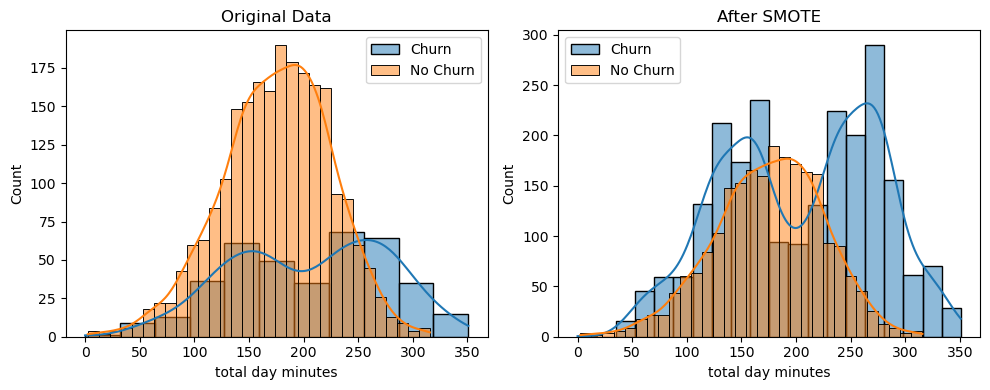

In [28]:
# Compare distributions of a key feature (e.g., total day minutes)
plt.figure(figsize=(10, 4))

# Original training data
plt.subplot(1, 2, 1)
sns.histplot(X_train[y_train == 1]['total day minutes'], label='Churn', kde=True)
sns.histplot(X_train[y_train == 0]['total day minutes'], label='No Churn', kde=True, alpha=0.5)
plt.title('Original Data')
plt.legend()

# SMOTE-balanced data
plt.subplot(1, 2, 2)
sns.histplot(X_train_res[y_train_res == 1]['total day minutes'], label='Churn', kde=True)
sns.histplot(X_train_res[y_train_res == 0]['total day minutes'], label='No Churn', kde=True, alpha=0.5)
plt.title('After SMOTE')
plt.legend()

plt.tight_layout()
plt.show()



In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Train and evaluate
results = {}
for name, model in models.items():
    # Train on balanced data
    model.fit(X_train_res, y_train_res)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for AUC
    
    # Store results
    results[name] = {
        "classification_report": classification_report(y_test, y_pred),
        "roc_auc": roc_auc_score(y_test, y_proba)
    }

# Print results
for name, result in results.items():
    print(f"----- {name} -----")
    print(result["classification_report"])
    print(f"AUC-ROC: {result['roc_auc']:.2f}\n")



----- Logistic Regression -----
              precision    recall  f1-score   support

           0       0.94      0.77      0.85       570
           1       0.35      0.73      0.48        97

    accuracy                           0.77       667
   macro avg       0.65      0.75      0.66       667
weighted avg       0.86      0.77      0.80       667

AUC-ROC: 0.82

----- Random Forest -----
              precision    recall  f1-score   support

           0       0.95      0.96      0.96       570
           1       0.78      0.73      0.76        97

    accuracy                           0.93       667
   macro avg       0.87      0.85      0.86       667
weighted avg       0.93      0.93      0.93       667

AUC-ROC: 0.91

----- Gradient Boosting -----
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       570
           1       0.70      0.71      0.70        97

    accuracy                           0.91       667
   macro a

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200],       # Number of trees
    'max_depth': [None, 10, 20],      # Maximum depth of trees
    'min_samples_split': [2, 5],      # Minimum samples to split a node
    'min_samples_leaf': [1, 2]        # Minimum samples at a leaf node
}

# Initialize GridSearchCV
rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=rf_param_grid,
    scoring='roc_auc',                # Optimize for AUC-ROC
    cv=5,                             # 5-fold cross-validation
    n_jobs=-1                         # Use all CPU cores
)

# Fit on balanced training data
rf_grid.fit(X_train_res, y_train_res)
# Best parameters and score
print("Best Random Forest Parameters:", rf_grid.best_params_)
print("Best AUC-ROC (CV):", rf_grid.best_score_)

Best Random Forest Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best AUC-ROC (CV): 0.9931132656201909


In [31]:
from sklearn.metrics import accuracy_score, roc_auc_score

# Predict on training data
y_train_pred = model.predict(X_train)
y_train_prob = model.predict_proba(X_train)[:, 1]

# Predict on test data
y_test_pred = model.predict(X_test)
y_test_prob = model.predict_proba(X_test)[:, 1]

# Calculate scores
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

print("Training ROC AUC:", roc_auc_score(y_train, y_train_prob))
print("Test ROC AUC:", roc_auc_score(y_test, y_test_prob))


Training Accuracy: 0.9587396849212303
Test Accuracy: 0.9130434782608695
Training ROC AUC: 0.9534155985819472
Test ROC AUC: 0.8964912280701753


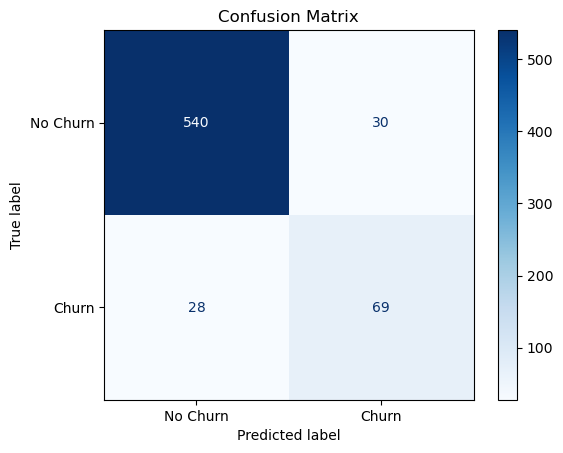

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict class labels for test data
y_test_pred = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_test_pred, labels=[0, 1])

# Plot it nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [33]:
pip install xgboost


In [34]:


from xgboost import XGBClassifier

# Parameter grid for XGBoost
xgb_param_grid = {
    'learning_rate': [0.01, 0.1],     # Shrinkage to prevent overfitting
    'n_estimators': [100, 200],       # Number of boosting stages
    'max_depth': [3, 5],              # Maximum tree depth
    'subsample': [0.8, 1.0],         #  % of samples used per tree
    'colsample_bytree': [0.8, 1.0]    #% of features used per tree
}

# Initialize GridSearchCV
xgb_grid = GridSearchCV(
    estimator=XGBClassifier(random_state=42, eval_metric='logloss'),
    param_grid=xgb_param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)
# Fit on balanced training data
xgb_grid.fit(X_train_res, y_train_res)

# Best parameters and score
print("Best XGBoost Parameters:", xgb_grid.best_params_)
print("Best AUC-ROC (CV):", xgb_grid.best_score_)


Best XGBoost Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best AUC-ROC (CV): 0.9909308633425669


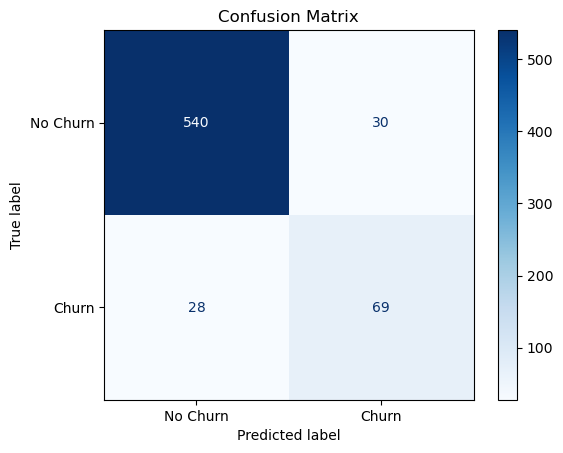

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict class labels for test data
y_test_pred = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_test_pred, labels=[0, 1])

# Plot it nicely
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

<b>Hyperparameter tuning</b>

In [37]:
from sklearn.ensemble import RandomForestClassifier

# Best parameters from grid search
best_rf_params = {
    'max_depth': 20,
    'min_samples_leaf': 2,
    'min_samples_split': 5,
    'n_estimators': 200
}

# Retrain on full resampled training data
best_rf = RandomForestClassifier(**best_rf_params, random_state=42)
best_rf.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=42)

In [38]:
# Predictions and probabilities
y_pred_rf = best_rf.predict(X_test)
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]  # Probabilities for churn (class=1)

In [39]:
from sklearn.metrics import classification_report

print("----- Tuned Random Forest -----")
print(classification_report(y_test, y_pred_rf, target_names=['No Churn', 'Churn']))

----- Tuned Random Forest -----
              precision    recall  f1-score   support

    No Churn       0.96      0.96      0.96       570
       Churn       0.78      0.74      0.76        97

    accuracy                           0.93       667
   macro avg       0.87      0.85      0.86       667
weighted avg       0.93      0.93      0.93       667



In [40]:
from xgboost import XGBClassifier

# Best parameters from grid search
best_xgb_params = {
    'colsample_bytree': 0.8,
    'learning_rate': 0.1,
    'max_depth': 5,
    'n_estimators': 200,
    'subsample': 0.8
}

# Retrain on full resampled training data
best_xgb = XGBClassifier(**best_xgb_params, random_state=42, eval_metric='logloss')
best_xgb.fit(X_train_res, y_train_res)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [41]:
y_pred_xgb = best_xgb.predict(X_test)
y_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]

In [42]:
print("\n----- Tuned XGBoost -----")
print(classification_report(y_test, y_pred_xgb, target_names=['No Churn', 'Churn']))


----- Tuned XGBoost -----
              precision    recall  f1-score   support

    No Churn       0.96      0.98      0.97       570
       Churn       0.86      0.75      0.80        97

    accuracy                           0.95       667
   macro avg       0.91      0.87      0.89       667
weighted avg       0.94      0.95      0.94       667



In [43]:
from sklearn.metrics import accuracy_score

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

train_acc = accuracy_score(y_train, train_preds)
test_acc = accuracy_score(y_test, test_preds)

print("Training Accuracy:", train_acc)
print("Testing Accuracy:", test_acc)

Training Accuracy: 0.9587396849212303
Testing Accuracy: 0.9130434782608695


In [44]:
from sklearn.metrics import roc_auc_score

print(f"Random Forest AUC-ROC: {roc_auc_score(y_test, y_proba_rf):.2f}")
print(f"XGBoost AUC-ROC: {roc_auc_score(y_test, y_proba_xgb):.2f}")

Random Forest AUC-ROC: 0.90
XGBoost AUC-ROC: 0.91


In [45]:
from sklearn.metrics import classification_report

for threshold in [0.78, 0.6, 0.5, 0.4, 0.3]:
    y_pred_new = (y_proba_xgb >= threshold).astype(int)
    print(f"--- Threshold: {threshold} ---")
    print(classification_report(y_test, y_pred_new))

--- Threshold: 0.78 ---
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       570
           1       0.93      0.67      0.78        97

    accuracy                           0.94       667
   macro avg       0.94      0.83      0.87       667
weighted avg       0.94      0.94      0.94       667

--- Threshold: 0.6 ---
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       570
           1       0.87      0.74      0.80        97

    accuracy                           0.95       667
   macro avg       0.91      0.86      0.88       667
weighted avg       0.94      0.95      0.94       667

--- Threshold: 0.5 ---
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       570
           1       0.86      0.75      0.80        97

    accuracy                           0.95       667
   macro avg       0.91      0.87      0.89       667
weig

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

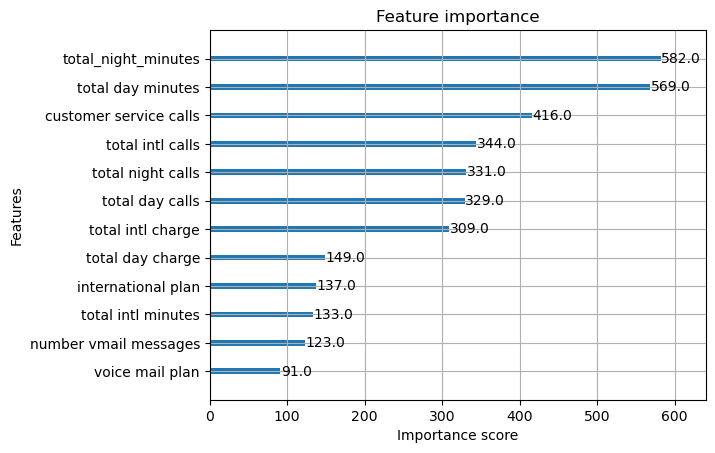

In [46]:
from xgboost import plot_importance
plot_importance(best_xgb)


In [47]:
importances = model.feature_importances_
print(importances)


[0.29507257 0.2488523  0.04627438 0.05624984 0.06448141 0.20476559
 0.00311949 0.0555263  0.0045443  0.01621538 0.00294329 0.00195515]


In [48]:
# Convert to pandas Series for better readability
importances_series = pd.Series(importances, index=X_train.columns)

# Sort from most to least important
importances_series_sorted = importances_series.sort_values(ascending=False)
print(importances_series_sorted)


customer service calls    0.295073
international plan        0.248852
total day charge          0.204766
voice mail plan           0.064481
total day minutes         0.056250
total intl calls          0.055526
total_night_minutes       0.046274
total intl minutes        0.016215
total intl charge         0.004544
number vmail messages     0.003119
total day calls           0.002943
total night calls         0.001955
dtype: float64


In [49]:
from xgboost import XGBClassifier
# Best hyperparameters you found using grid search
best_xgb_params = {
    'colsample_bytree': 0.8,     # % of features used per tree
    'learning_rate': 0.1,        # Step size (smaller = more precise, slower training)
    'max_depth': 5,              # Tree depth (controls complexity)
    'n_estimators': 200,         # Number of trees
    'subsample': 0.8,             # % of rows used to train each tree
    'min_child_weight': 5

}
scale_pos_weight = len(y_train_res[y_train_res==0]) / len(y_train_res[y_train_res==1])

# Create the model with those parameters
best_xgb = XGBClassifier(**best_xgb_params, scale_pos_weight=scale_pos_weight, random_state=42, eval_metric='logloss')

# Fit the model on resampled training data (oversampling or SMOTE, etc.)
best_xgb.fit(X_train_res, y_train_res)

# Predict probabilities on the test data
y_probs = best_xgb.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (churn)

# Apply your custom threshold
threshold = 0.4
y_pred = (y_probs >= threshold).astype(int)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.97      0.97       570
           1       0.81      0.78      0.80        97

    accuracy                           0.94       667
   macro avg       0.89      0.88      0.88       667
weighted avg       0.94      0.94      0.94       667



In [77]:
import joblib

joblib.dump(best_xgb, 'final_model.pkl')
joblib.dump(final_features, 'final_features.pkl')


['final_features.pkl']